# Set Up

In [1]:
import os 
import math 

import pandas as pd 
import numpy as np 
import folium
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 

from data_processing.preprocessor import *
from utils.utils import * 

# Load Data

In [2]:
prep = preprocessor('/home/amine/University_Project/ml_geodetic_project/Data')
prep.meta_data()

Station   Latitude   Longitude  Elevation start_date end_date
0     B001  48.043070 -123.131410      237.0       2005     2020
1     B003  48.062360 -124.140860      314.0       2005     2020
2     B004  48.201925 -124.427006       30.0       2005     2020
3     B005  48.059549 -123.503278      302.7       2005     2020
4     B006  48.058800 -123.500800      302.0       2005     2020
..     ...        ...         ...        ...        ...      ...
71    B941  46.986800 -122.219000      151.0       2008     2020
72    B943  47.813200 -122.911300       84.2       2010     2020
73    B944  44.389700 -110.543800     2364.6       2008     2020
74    B946  33.537300 -116.592500     1429.0       2010     2020
75    B950  44.712800 -110.678500     2328.4       2013     2020

[76 rows x 6 columns]

In [3]:
prep.meta_data().start_date.max()

'2013'

In [4]:
prep.meta_data().start_date.min()

'2005'

# Level 2 Data 

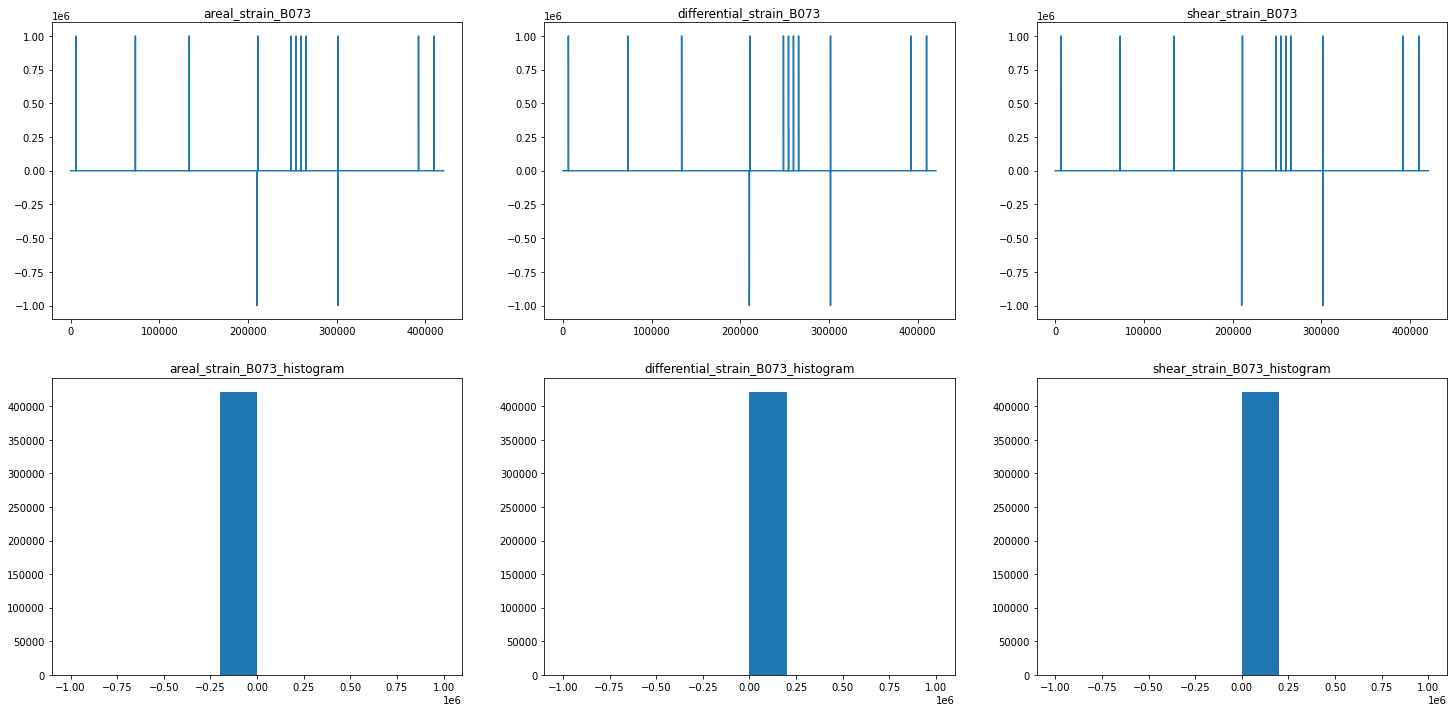

In [5]:
stations = ['B073']
prep.load( stations = stations, 
           start_date = 2017, 
           end_date = 2020 , 
           verbose = True )
namesofSeries = prep.data.columns.tolist()
series = [prep.data[x].values for x in namesofSeries]
namesofSeries += [x + '_histogram' for x in prep.data.columns.tolist()]
series += series
plot_series_hist(series, namesofSeries )

In [6]:
stations = ['B076']
prep.load( stations = stations, 
           start_date = 2017, 
           end_date = 2020 , 
           verbose = True )
namesofSeries = prep.data.columns.tolist()
series = [prep.data[x].values for x in namesofSeries]
namesofSeries += [x + '_histogram' for x in prep.data.columns.tolist()]
series += series
plot_series_hist(series, namesofSeries )

# Filtring using Flags 

In this part we will replace all the missing and the bad observations by nan then we will try to correct those observation using linear interploation.

number of interpolated observation of areal_strain_B073 is 112 on 2017
number of interpolated observation of differential_strain_B073 is 112 on 2017
number of interpolated observation of shear_strain_B073 is 112 on 2017
number of interpolated observation of areal_strain_B073 is 143 on 2018
number of interpolated observation of differential_strain_B073 is 143 on 2018
number of interpolated observation of shear_strain_B073 is 143 on 2018
number of interpolated observation of areal_strain_B073 is 539 on 2019
number of interpolated observation of differential_strain_B073 is 539 on 2019
number of interpolated observation of shear_strain_B073 is 539 on 2019
number of interpolated observation of areal_strain_B073 is 157 on 2020
number of interpolated observation of differential_strain_B073 is 157 on 2020
number of interpolated observation of shear_strain_B073 is 157 on 2020


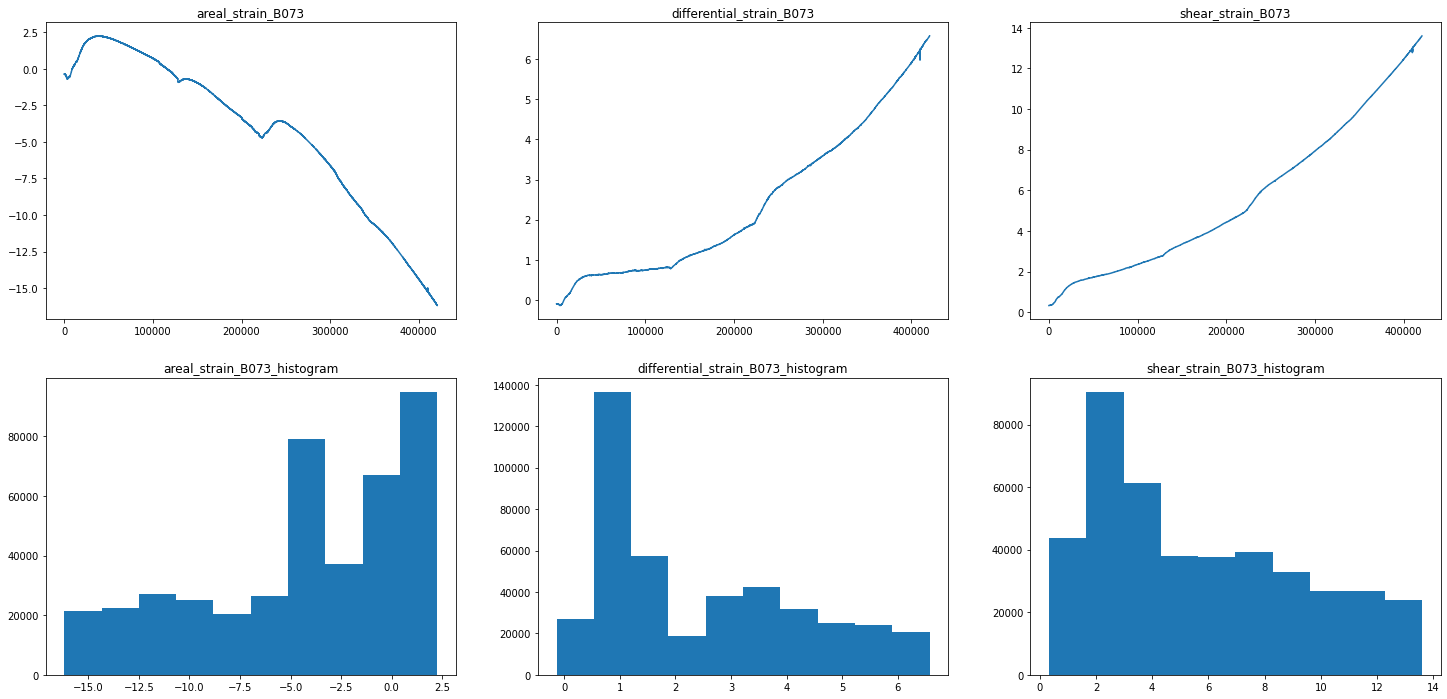

In [7]:
stations = ['B073']
prep.load( stations = stations, 
           start_date = 2017, 
           end_date = 2020 , 
           flag_filter = 'linear' , 
           verbose = True )
namesofSeries = prep.data.columns.tolist()
series = [prep.data[x].values for x in namesofSeries]
namesofSeries += [x + '_histogram' for x in prep.data.columns.tolist()]
series += series
plot_series_hist(series, namesofSeries )

In [8]:
stations = ['B076']
prep.load( stations = stations, 
           start_date = 2017, 
           end_date = 2020 , 
           flag_filter = 'linear' , 
           verbose = True )
namesofSeries = prep.data.columns.tolist()
series = [prep.data[x].values for x in namesofSeries]
namesofSeries += [x + '_histogram' for x in prep.data.columns.tolist()]
series += series
plot_series_hist(series, namesofSeries )

number of interpolated observation of areal_strain_B076 is 73555 on 2017
number of interpolated observation of differential_strain_B076 is 73555 on 2017
number of interpolated observation of shear_strain_B076 is 73555 on 2017
number of interpolated observation of areal_strain_B076 is 30112 on 2018
number of interpolated observation of differential_strain_B076 is 30112 on 2018
number of interpolated observation of shear_strain_B076 is 30112 on 2018
number of interpolated observation of areal_strain_B076 is 105073 on 2019
number of interpolated observation of differential_strain_B076 is 105073 on 2019
number of interpolated observation of shear_strain_B076 is 105073 on 2019
number of interpolated observation of areal_strain_B076 is 91065 on 2020
number of interpolated observation of differential_strain_B076 is 91065 on 2020
number of interpolated observation of shear_strain_B076 is 91065 on 2020


# Finding the Bad Stations 

In [9]:
meta_data = prep.get_per_of_bad_obs_per_station()

station: B033 , year : 2018
station: B033 , year : 2019
station: B033 , year : 2020
station: B205 , year : 2013
station: B205 , year : 2014
station: B205 , year : 2015
station: B205 , year : 2016
station: B205 , year : 2017
station: B205 , year : 2018
station: B205 , year : 2019
station: B205 , year : 2020
station: B206 , year : 2017
station: B206 , year : 2018
station: B206 , year : 2019
station: B206 , year : 2020


In [10]:
meta_data.bad_obs_mean.hist()

<AxesSubplot:>

In [11]:
meta_data['Bad_station'] =  (meta_data['bad_obs_mean']> 0.08)

In [12]:
meta_data['Bad_station'].mean()

0.14473684210526316

In [13]:
def get_color(x) : 
    if x : 
        return 'red' 
    else : 
        return 'green' 
meta_data['color'] = meta_data['Bad_station'].apply(get_color)

In [14]:
map_osm = folium.Map(location=[35.9467, -120.4717], zoom_start=4)
meta_data.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                              radius=25,fill_color=row['color'],popup=row['Station'],fill_opacity=0.5,)
                                             .add_to(map_osm), axis=1)
map_osm

# Remove Trend 

## method 1 : Detrend by Differencing   

the simplest method to detrend a time series is by differencing.

$$ strain(t) = strain(t) - strain(t-1) $$ 

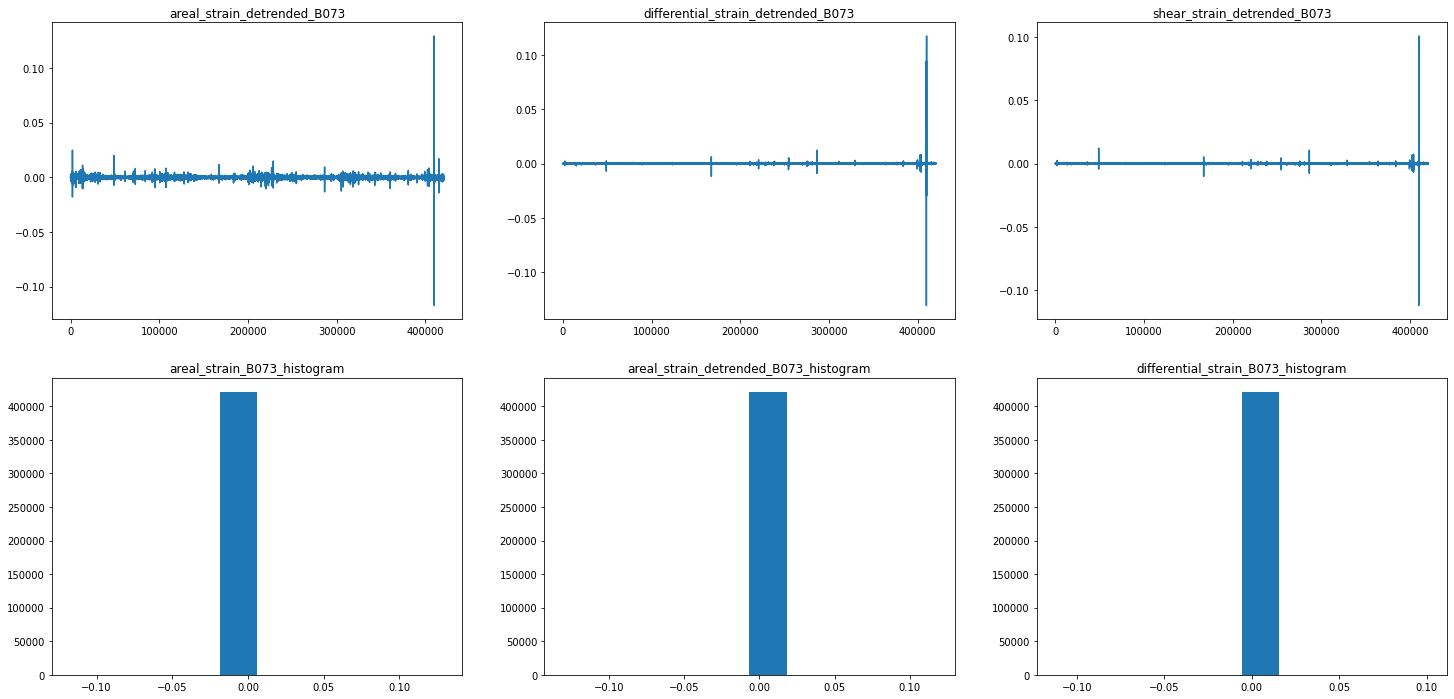

In [15]:
stations = ['B073']
prep.load( stations = stations, 
           start_date = 2017, 
           end_date = 2020 , 
           flag_filter = 'linear' , 
           verbose = False , 
           detrending = 'diff')

namesofSeries = [x for x in prep.data.columns.tolist() if '_detrended_' in x]
series = [prep.data[x].values for x in namesofSeries ]
namesofSeries += [x + '_histogram' for x in prep.data.columns.tolist()]
series += series
plot_series_hist(series, namesofSeries )

## method 2 : Detrend by Model Fitting 

### Example (detrending using Linear Model) 

In this method we will assume that the trend is linear. So, we will do linear regression and find out. 

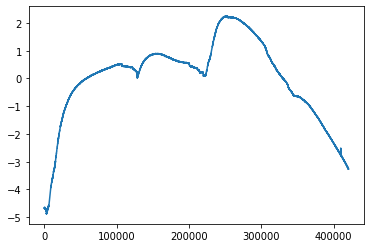

In [17]:
stations = ['B073']
prep.load( stations = stations, 
           start_date = 2017, 
           end_date = 2020 , 
           flag_filter = 'linear' , 
           verbose = False , 
           detrending = None)

series = prep.data.areal_strain_B073.values
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
plt.plot(detrended)
plt.show()

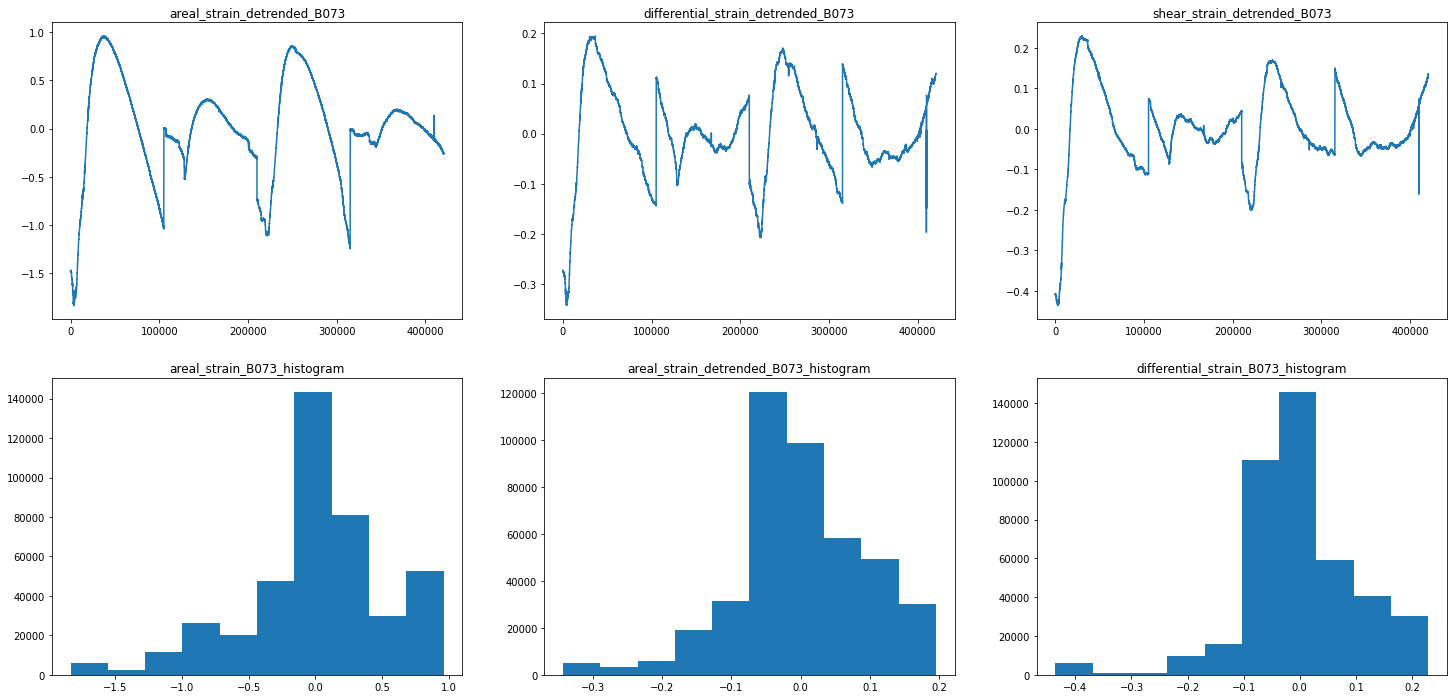

In [18]:
stations = ['B073']
prep.load( stations = stations, 
           start_date = 2017, 
           end_date = 2020 , 
           flag_filter = 'linear' , 
           verbose = False , 
           detrending = 'linear_fitting')

namesofSeries = [x for x in prep.data.columns.tolist() if '_detrended_' in x]
series = [prep.data[x].values for x in namesofSeries ]
namesofSeries += [x + '_histogram' for x in prep.data.columns.tolist()]
series += series
plot_series_hist(series, namesofSeries )

Not very convincing. There’s still trend left in the data. Probably the original trend was not linear to begin with. We could try to fit it with a polynomial curve. But the problem that we have many stations.